# Project: Wrangling and Analyze Data

In [1]:
# initializing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
import tweepy
import os
import json
import sys
import re
import time

%matplotlib inline
%run load_api.py

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from functools import reduce
from numpy import median
from timeit import default_timer as timer
from tweepy import OAuthHandler
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from datetime import datetime
# from config import Config

ERROR:root:File `'load_api.py'` not found.


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
twitter_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# creating a folder and checking if it does exist to put the data
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
# downloading the data in the url and reading 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
#Putting the data in the folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [9]:
os.listdir(folder_name)

['tweet_json.txt', 'tweet_json.text', 'image-predictions.tsv']

In [10]:
#load them as a datafame
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [13]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
print(tweet_ids)


[892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]


In [14]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

In [15]:
df_list = []
with open ('tweet_json.txt','r') as json_file:
    for tweet_id in json_file:
        tweet = json.loads(tweet_id)
        
        tweet_id = tweet["id"]
        retweet_count = tweet['retweet_count']
        fave_count = tweet['favorite_count']
        
        df_list.append({'tweet_id' : tweet_id,'retweet_count' : retweet_count, 'favorite_count' : fave_count})

json_df = pd.DataFrame(df_list,columns = ['tweet_id', 'retweet_count', 'favorite_count'])        
json_df.head()      

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [17]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
 # Checking for Duplicate values corresponding to IDs.
twitter_archive['tweet_id'].duplicated().sum()

0

In [20]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
Bailey          7
an              7
Toby            7
Buddy           7
Jack            6
Milo            6
Dave            6
Leo             6
Oscar           6
Rusty           6
Scout           6
Bella           6
Koda            6
Stanley         6
Jax             6
George          5
             ... 
Chef            1
Sailer          1
Brandonald      1
Ron             1
Damon           1
Holly           1
Timofy          1
Saydee          1
Dug             1
Pancake         1
Banditt         1
Butters         1
Tebow           1
Biden           1
Stefan          1
Hero            1
Filup           1
Andru           1
Dook            1
Bode            1
Trip            1
Hall            1
Chuck           1
Farfle          1
Ebby      

In [21]:
twitter_archive[twitter_archive['name'] == 'None'][['text', 'name']].sample(20)

,text,name
391,"Here's a little more info on Dew, your favorit...",None
1885,I have found another. 13/10 https://t.co/HwroP...,None
1939,When you're having a great time sleeping and y...,None
1680,Unique dog here. Wrinkly as hell. Weird segmen...,None
362,Here's a stressed doggo. Had a long day. Many ...,None
913,She walks herself up and down the train to be ...,None
137,RT @dog_rates: Here's a pupper before and afte...,None
2157,Special dog here. Pretty big. Neck kinda long ...,None
1903,This pupper is fed up with being tickled. 12/1...,None
251,PUPDATE: I'm proud to announce that Toby is 23...,None


In [22]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Checking for Duplicate values corresponding to IDs.
image_predictions['tweet_id'].duplicated().sum()

0

In [25]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
json_df['tweet_id'].duplicated().sum()

0

### Quality issues
1.The timestamp is present as an object, which is supposed to be converted into datetime to be exploitable.

2.The "tweet_id" currently present as an 'INT' should be converted to 'string' datatype.

3.Some retweets present (RT @ ...)

4.Several rows with wrong rating denominators and some rows with rating denominator below 10 

5.Text and http url are joined together in the text column

6.Unnecessary columns

7.55 names 'a', 7 names 'an' 

8.Some replies to other users present

### Tidiness issues
1.The variables doggo, floofer, pupper and puppo should be a part of a single column.

2.Datasets in separate dataframes

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
twitter_archive1= twitter_archive.copy()


In [29]:
image_predictions1 = image_predictions.copy()

In [30]:
json_df1 = json_df.copy()

### Issue :Datasets in seperate dataframes

#### Define:First join the datasets together to address the untidy nature of them being separate before addressing the quality issues.

In [31]:
#joining twitter_archive and json_df_new so that it retains only the tweets that have a retweet and like count
new_df = twitter_archive1.merge(json_df1, on='tweet_id',how='right')

new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count                 23

In [33]:
new_df.shape

(2354, 19)

In [34]:
#now joining the image_predictions to the new_df
df = new_df.merge(image_predictions1, on='tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

In [35]:
df.shape

(2073, 30)

adding the image_predictions reduced the tweets from 2354 to 2073

#### Test

In [36]:
#making a copy of the dataset
df1 = df.copy()

In [37]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Issue : Remove the retweets by selecting only the null retweeted status ids


In [39]:
df1 = df1[df1.retweeted_status_id.isnull()]

In [40]:
#test
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

### Issue : Remove the replies by selecting only null in_reply_to_user_id ids

In [41]:
df1 = df1[df1.in_reply_to_user_id.isnull()]

In [42]:
#test
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
retweet_count                 1971 non-n

### Issue : Fixing the names that were assigned 'a', 'an'  by replacing the with their correct name 

In [43]:
df1[df1['name'] =='a'][['text', 'name']]

,text,name
50,Here is a pupper approaching maximum borkdrive...,a
524,Here is a perfect example of someone who has t...,a
647,Guys this is getting so out of hand. We only r...,a
822,This is a mighty rare blue-tailed hammer sherk...,a
824,Viewer discretion is advised. This is a terrib...,a
833,This is a carrot. We only rate dogs. Please on...,a
859,This is a very rare Great Alaskan Bush Pupper....,a
995,People please. This is a Deadly Mediterranean ...,a
1005,This is a taco. We only rate dogs. Please only...,a
1122,Here is a heartbreaking scene of an incredible...,a


In [44]:
a_nme = df1[df1['name'] == 'a']
a_nme.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
524,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,...,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
647,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,...,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
822,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,...,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
824,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,...,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True


In [45]:
a_new = a_nme[a_nme['text'].str.contains('name*')]
a_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1262,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,...,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True
1580,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,...,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True
1677,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,...,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
1756,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,...,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
1787,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,...,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1837,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,...,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True
1846,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,...,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False
1849,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,...,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
1867,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,...,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False
1881,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,...,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True


In [46]:
new_names = []
for index, row in a_new.iterrows():
    
    string = str(row['text'])
    befor_keyowrd, keyword, after_keyword = string.partition('named')
    name = after_keyword.split('.')[0]
    new_names.append({'index': index, 'name': name})
    


new_names = pd.DataFrame(new_names)
new_names = new_names.set_index('index')
new_names

,name
index,
1262,
1580,Wylie
1677,Kip
1756,Jacob (Yacōb)
1787,Rufus
1837,Spork
1846,Cherokee
1849,Hemry
1867,Alphred


In [47]:
#merging to the database
df1.update(new_names)
df1.duplicated().sum(), df1.tweet_id.duplicated().sum()

(0, 0)

In [48]:
df1[df1['name'] == 'named']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [49]:
#Replace the remaining entries where names = 'a' to name = "None"
df1['name'] = np.where(df1['name'] == 'a', 'None', df1['name'])
df1.tweet_id.duplicated().sum()
df1.name.value_counts()

None          558
Charlie        11
Lucy           10
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Lola            7
Daisy           7
the             7
Toby            7
Stanley         6
Jax             6
Koda            6
Bella           6
an              6
Bo              6
Scout           5
Louis           5
Dave            5
Chester         5
Leo             5
Milo            5
Bailey          5
Rusty           5
Oscar           5
Buddy           5
Duke            4
             ... 
Banditt         1
Tebow           1
Jangle          1
Stefan          1
Rubio           1
Hero            1
Gidget          1
Dunkin          1
Kallie          1
Nida            1
Vinnie          1
Bodie           1
Brutus          1
Bubba           1
Grady           1
Newt            1
Ginger          1
Timmy           1
Cermet          1
Marlee          1
Christoper      1
Shnuggles       1
Divine          1
 Hemry          1
Ralf      

In [50]:
#Fix names with 'an'
df1.loc[1917, 'name'] = 'Berta'
df1['name'] = np.where(df1['name'] == 'an' , 'None', df1['name'])

#### Test

In [51]:
df1[df1['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [52]:
#test
df1[df1['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue :Several rows with wrong rating denominators and some rows with rating denominator below 10 

In [53]:
df1.loc[962][['text', 'rating_denominator']]
df1.loc[1414, 'rating_denominator'] = 10

In [54]:
df1.loc[996][['text', 'rating_denominator']]
df1.loc[996, 'rating_denominator'] = 10

In [55]:
df1.loc[1400][['text', 'rating_denominator']]
df1.loc[1400, 'rating_denominator'] = 10

In [56]:
df1.loc[2046][['text', 'rating_denominator']]
df1.loc[2046, 'rating_denominator'] = 10

In [57]:
df1.loc[871][['text', 'rating_denominator']]
df1.loc[871, 'rating_denominator'] = 10

In [58]:
df1[df1['rating_denominator'] < 10][['text', 'rating_denominator']]
df1.loc[411, 'rating_denominator'] = 'None'

In [59]:
#Joining the numerator and denominator
df1[['rating_numerator', 'rating_denominator']]=df1[['rating_numerator', 'rating_denominator']].astype(str)


In [60]:
df1['rating'] = df1[['rating_numerator', 'rating_denominator']].apply(lambda x: '/'.join(x), axis=1)

In [61]:
df1.rating.sample(5)

891      9/10
1209     8/10
161     12/10
1765     6/10
15      13/10
Name: rating, dtype: object

### Issue :Text and http url are joined together in the text column, separate them 

In [62]:
#extract the url and make a new column
df1['url'] = 'https' + df1.text.str.split('https', expand=True)[1]
# extract just the text
df1['text'] = df1.text.str.split('https', expand=True)[0]

In [63]:
#test
df1[['url', 'text']].head()

,url,text
0,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...
1,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....
2,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...
3,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...
4,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...


### Issue :The timestamp is present as an object, which is supposed to be converted into datetime .

In [64]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])

In [65]:
#test
df1[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 1 columns):
timestamp    1971 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 110.8 KB


### Issue :The "tweet_id" currently present as an 'INT' should be converted to 'string' datatype.

In [66]:
df1['tweet_id']=df1['tweet_id'].astype(str)

In [67]:
#test
df1[['tweet_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 1 columns):
tweet_id    1971 non-null object
dtypes: object(1)
memory usage: 110.8+ KB


### Issue :doggo, floofer, pupper and puppo present in the data  should be a part of a single column.


In [68]:
df1.info()
df1.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null object
rating_denominator            1971 non-null object
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
retweet_count                

0

In [69]:
#turn the string descriptions to 0/1s
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
mapping = {'None':0, 'doggo':1, 'floofer':1, 'pupper':1, 'puppo':1}
df1.replace({'doggo': mapping, 'floofer': mapping, 'pupper': mapping, 'puppo': mapping}, inplace=True)
df1[col_list].sample(15)

,doggo,floofer,pupper,puppo
1998,0,0,0,0
180,0,0,0,0
305,0,0,0,0
1032,0,0,0,0
1426,0,0,1,0
1642,0,0,0,0
1973,0,0,0,0
1400,0,0,1,0
1023,0,0,0,0
1406,0,0,1,0


In [70]:
#check to see if there are any that were assigned multiple stages
np.sum(df1[col_list].sum(axis=1) > 1)

10

In [71]:
df1['multi_stage'] = np.where(df1[col_list].sum(axis=1) > 1, 2, 0)
#test it out
df1[df1['multi_stage'] ==2].loc[:,'doggo':'multi_stage']

,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,url,multi_stage
154,1,0,0,1,19196,47844,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,13/10,https://t.co/cMhq16isel,2
160,1,1,0,0,3433,17169,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,11/10,https://t.co/TXdT3tmuYk,2
366,1,0,1,0,3084,11901,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,13/10,https://t.co/m7isZrOBX7,2
429,1,0,1,0,2525,9701,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,12/10,https://t.co/ANBpEYHaho,2
464,1,0,1,0,2429,8992,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,12/10,https://t.co/55Dqe0SJNj,2
566,1,0,1,0,2561,8735,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,10/10,https://t.co/f2wmLZTPHd,2
722,1,0,1,0,2173,6620,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,12/10,https://t.co/MYwR4DQKll,2
780,1,0,1,0,1265,4849,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,5/10,https://t.co/u2c9c7qSg8,2
871,1,0,1,0,3520,10342,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,12/10,https://t.co/o5J479bZUC,2
917,1,0,1,0,17621,44619,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,12/10,https://t.co/pG2inLaOda,2


In [72]:
#assign a no stage variable
df1['nostage'] = np.where(df1[col_list].sum(axis=1) == 1, 0, 1)

In [73]:
df1['stage']= (df1.loc[:,['doggo', 'floofer', 'pupper','puppo', 'nostage', 'multi_stage']]).idxmax(axis=1)

In [74]:
#test it out
df1[['doggo', 'floofer', 'pupper','puppo', 'nostage', 'multi_stage', 'stage']].sample(19)

,doggo,floofer,pupper,puppo,nostage,multi_stage,stage
771,1,0,0,0,0,0,doggo
770,0,0,0,0,1,0,nostage
20,0,0,0,0,1,0,nostage
1935,0,0,0,0,1,0,nostage
1071,0,0,0,0,1,0,nostage
2002,0,0,0,0,1,0,nostage
1401,0,0,1,0,0,0,pupper
1981,0,0,0,0,1,0,nostage
1036,0,0,1,0,0,0,pupper
1094,0,0,0,0,1,0,nostage


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 35 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null object
rating_denominator            1971 non-null object
name                          1971 non-null object
doggo                         1971 non-null int64
floofer                       1971 non-null int64
pupper                        1971 non-null int64
puppo                         1971 non-null int64
retweet_count                 197

In [76]:
#drop extra columns
drop_cols = ['doggo', 'floofer', 'pupper','puppo', 'nostage', 'multi_stage', 'rating_numerator', 'rating_denominator', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
df1.drop(drop_cols, axis=1, inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
df1.to_csv('twitter_archive_master.csv',index=False)

verifying storage of data by reading the file.

In [78]:
final_data = pd.read_csv('twitter_archive_master.csv')

In [79]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id          1971 non-null int64
timestamp         1971 non-null object
source            1971 non-null object
text              1971 non-null object
expanded_urls     1971 non-null object
name              1969 non-null object
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
jpg_url           1971 non-null object
img_num           1971 non-null int64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null bool
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null bool
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null bool
rating            1971 non-null object
url               1971 non-null object
stage             1971 non-null object
dtypes: bool(3), float64(3), int64(4), obj

## Analyzing and Visualizing Data


### Visualizing Retweet Counts vs Stage

In [85]:
df1.stage.value_counts()
fr = df1['stage'].value_counts().to_dict()
fr

{'nostage': 1668,
 'pupper': 201,
 'doggo': 63,
 'puppo': 22,
 'multi_stage': 10,
 'floofer': 7}

Text(0.5,0,'Stage')

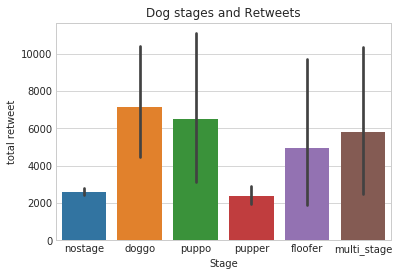

In [89]:
# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="retweet_count", data= df1)
g.set_ylabel('total retweet')

# Setting the appropriate headers
plt.title('Dog stages and Retweets')
plt.xlabel('Stage')


### Visualizing retweet count vs favourite count

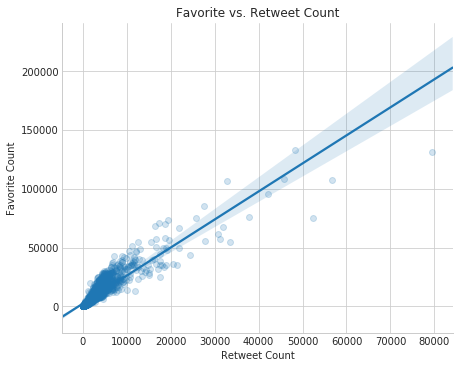

In [88]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data= df1,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

### Visualizing Retweet Counts vs Stage

In [102]:
# Generating a df with rating and frequency
df1['rating'].value_counts()
frequency = df1['rating'].value_counts().to_dict()
f = pd.DataFrame(list(frequency.items()), columns=['rating', 'frequency'])
f.head()

,rating,frequency
0,12/10,446
1,10/10,417
2,11/10,391
3,13/10,253
4,9/10,149


In [106]:
# Calculating the totals for Retweet
total_retweet =[]
for i in f['rating']:
    t_r = df1[df1['rating'] == i]['retweet_count'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

# Calculating the mean for Retweets
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,rating,frequency,total_retweet,retweet_mean
0,12/10,446,1400665,3140
1,10/10,417,632568,1516
2,11/10,391,867784,2219
3,13/10,253,1799620,7113
4,9/10,149,120462,808


Text(0.5,0,'Rating ratio')

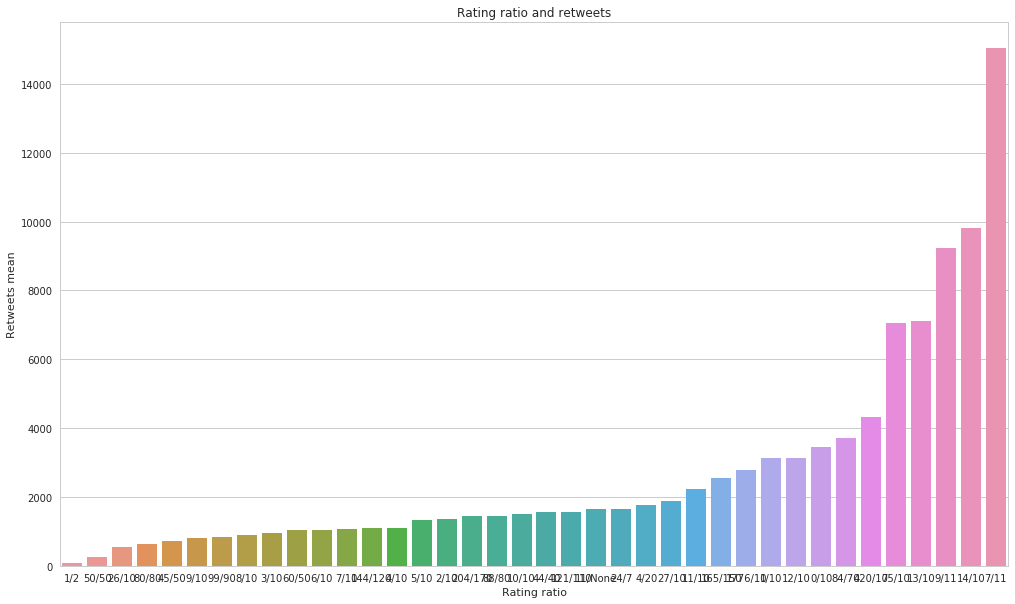

In [111]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,10)})

# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="rating", y="retweet_mean", data=f, order=f.sort_values("retweet_mean").rating)
g.set_ylabel('Retweets mean')

# Setting the appropriate headers
plt.title('Rating ratio and retweets')
plt.xlabel('Rating ratio')


### Insights:
1.The different stages of dogs have different counts of retweets the doggo stage having the most retweet counts as the pupper has the least retweet count.

2.Retweet count is positively correlated with favourite count,as favourite count increases the number of retweets increase.

3.The ratings of the tweets and retweet count couls be said to be positively correlated to each other,the retweet count increases as the ratings increase